# EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sp 
import pandas as pd 
import seaborn
from pandas.tools.plotting import scatter_matrix

pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 25)
pd.options.display.max_colwidth = 50 

%matplotlib inline 

rnd = np.random.RandomState(1234)

In [2]:
train = pd.read_csv("../Forest/train.csv")

In [3]:
train.head(2)

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5     ...      Soil_Type22  Soil_Type23  Soil_Type24  \
0           0           0     ...                0            0            0   
1           0           0     ...                0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   

   Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
0            0            0            0            0            0   
1            0            0            0            0            0   

   Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
0            0            0            0            0            0   
1            0            0            0            0            0   

   Soil_Type40  Cover_Type  
0            0           5  
1            0           5  

[2 rows x 56 columns]

In [5]:
for col in train.columns[:10]:
    train[col] = train[col].map(lambda x: (x - train[col].min())/ (train[col].max() -train[col].min()))

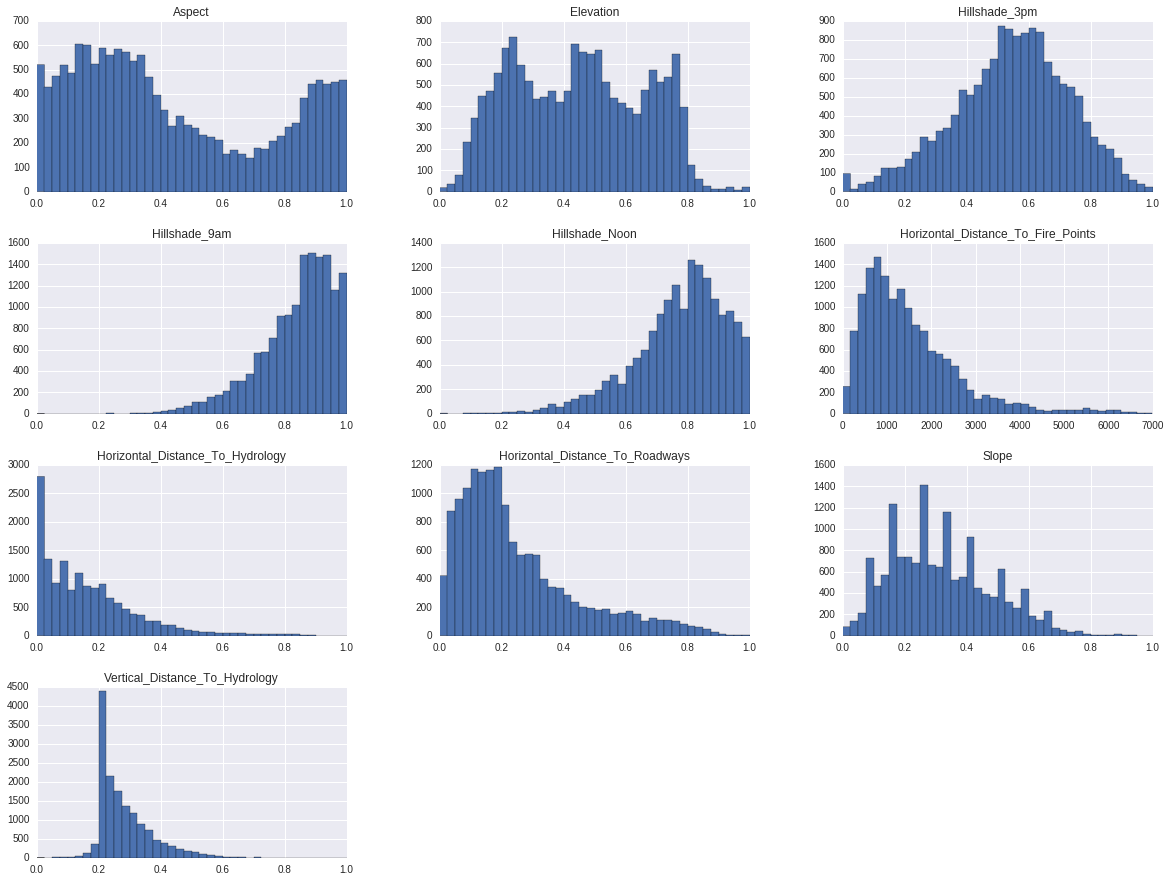

In [6]:
train.ix[:,1:11].hist(figsize=(20,15), bins=40)

plt.savefig('cont_var_hist.png')


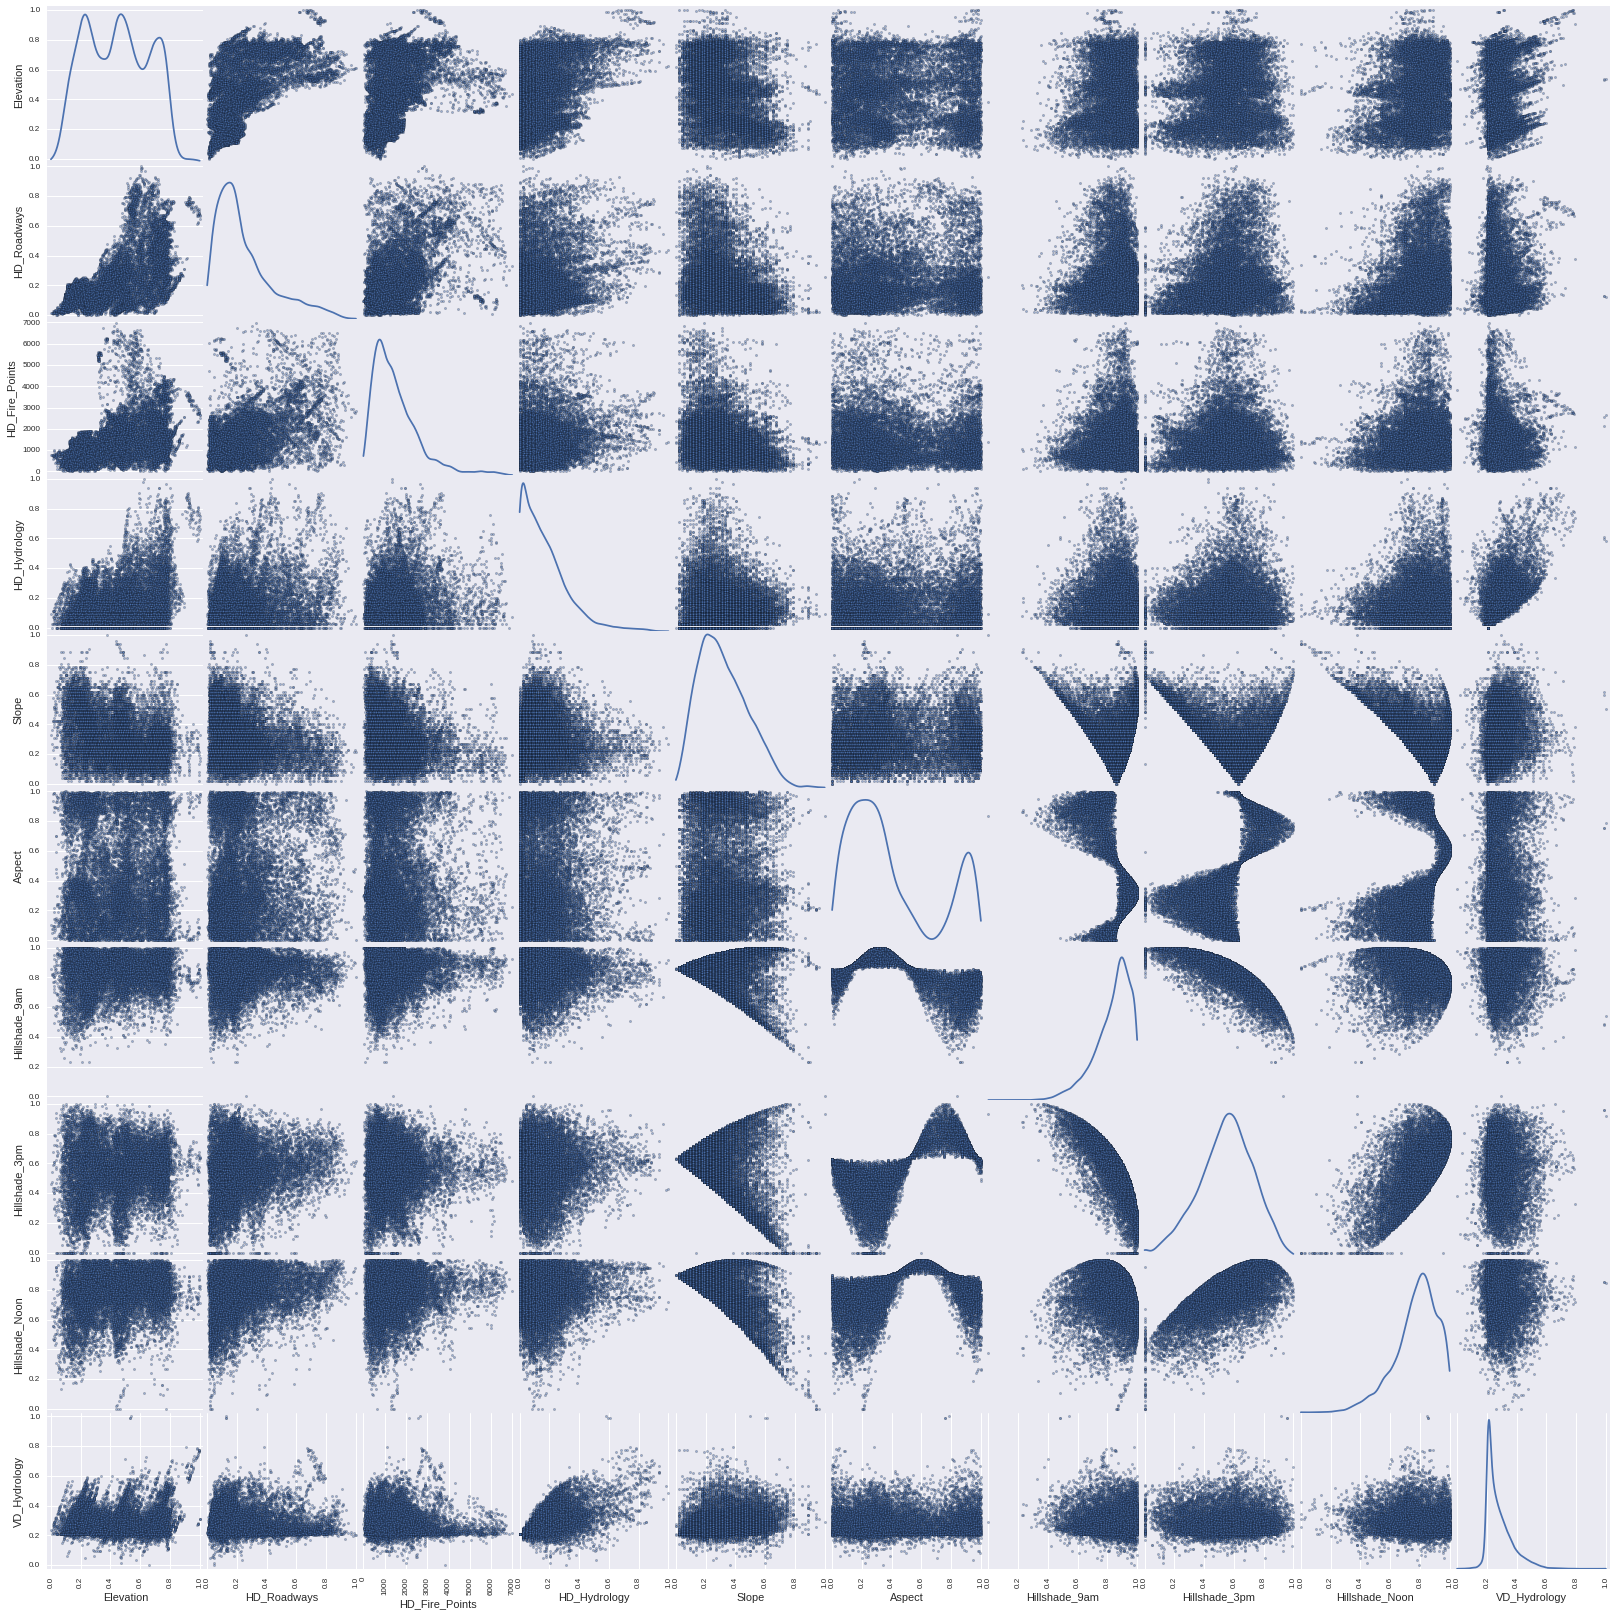

In [10]:
with seaborn.axes_style('ticks'): plt.figure(figsize=(8,8))
smaller_frame=train[['Elevation', 'Horizontal_Distance_To_Roadways',
                         'Horizontal_Distance_To_Fire_Points', 
                            'Horizontal_Distance_To_Hydrology',
                            'Slope', 'Aspect', 'Hillshade_9am',
                            'Hillshade_3pm', 'Hillshade_Noon',
                            'Vertical_Distance_To_Hydrology']]

smaller_frame.columns=smaller_frame.columns.map(lambda x: x.replace('Horizontal_Distance_To','HD')) 
smaller_frame.columns=smaller_frame.columns.map(lambda x: x.replace('Vertical_Distance_To','VD')) 
scatter_matrix(smaller_frame, figsize=(28, 28), diagonal="kde") 
plt.savefig('splom.png')

/home/mfc/.virtualenvs/dataMining/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


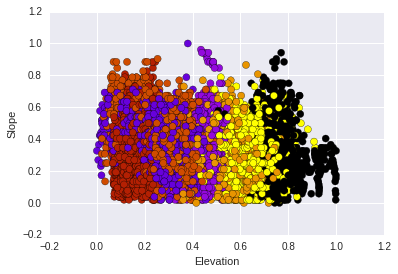

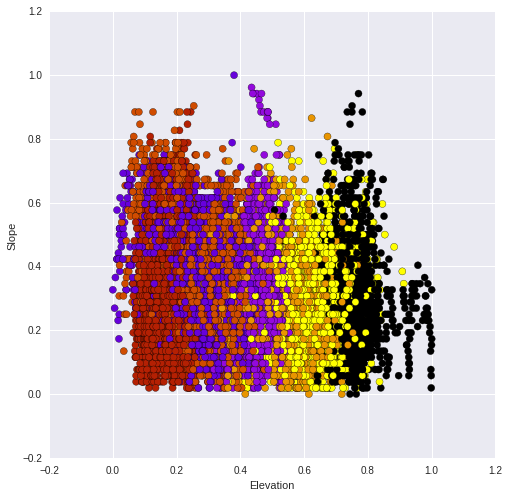

In [14]:
smaller_frame['Cover_Type'] = train.Cover_Type

plt.scatter(smaller_frame.Elevation- 0 * smaller_frame.Slope,
            (smaller_frame.Slope),
            c=smaller_frame.Cover_Type,
            s=50, cmap=plt.cm.gnuplot_r)
plt.xlabel("Elevation")
plt.ylabel("Slope")


plt.figure(figsize=(8,8))
plt.scatter(smaller_frame.Elevation- 0 * smaller_frame.Slope,
            (smaller_frame.Slope),
            c=smaller_frame.Cover_Type,
            s=50, cmap=plt.cm.gnuplot_r)
plt.xlabel("Elevation")
plt.ylabel("Slope")

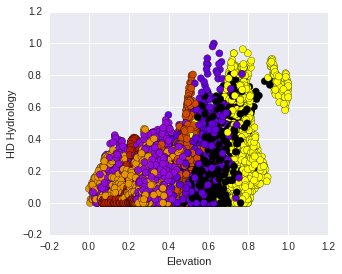

In [15]:


plt.figure(figsize=(5,4))
plt.scatter(smaller_frame.Elevation, smaller_frame.HD_Hydrology, c=smaller_frame.Cover_Type, s=50, cmap=plt.cm.gnuplot)
plt.xlabel("Elevation")
plt.ylabel("HD Hydrology")
plt.savefig('elevation_vs_H_Hydrology.png')

In [16]:
smaller_frame['Cover_Type'] = train.Cover_Type

/home/mfc/.virtualenvs/dataMining/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


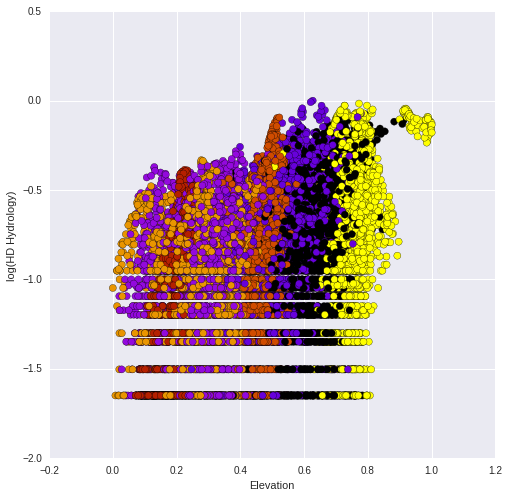

In [18]:
plt.figure(figsize=(8,8))
plt.scatter((smaller_frame.Elevation), 
            np.log10(smaller_frame.HD_Hydrology.values), 
            c=smaller_frame.Cover_Type, 
            s=50, cmap=plt.cm.gnuplot)

plt.xlabel("Elevation")
plt.ylabel("log(HD Hydrology)")
plt.savefig('eleveation_vs_log_hd_hydro.png') 

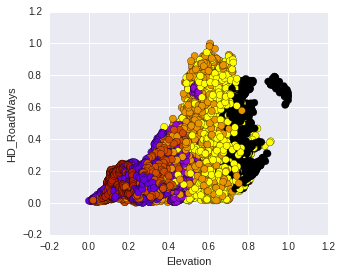

In [19]:
#Elevation adjusted vs HD Hydrology 
plt.figure(figsize=(5,4))
plt.scatter(smaller_frame.Elevation,
           (smaller_frame.HD_Roadways),
            c=smaller_frame.Cover_Type,
            s=50, cmap=plt.cm.gnuplot_r)
plt.xlabel("Elevation")
plt.ylabel("HD_RoadWays")
plt.savefig('elv_hd_roadways.png')


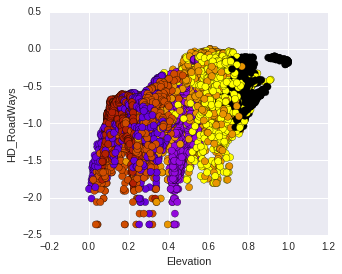

In [21]:
#Elevation adjusted vs HD Hydrology 
plt.figure(figsize=(5,4))
plt.scatter((smaller_frame.Elevation),
            np.log10(smaller_frame.HD_Roadways),
            c=smaller_frame.Cover_Type,
            s=50, cmap=plt.cm.gnuplot_r)
plt.xlabel("Elevation")
plt.ylabel("HD_RoadWays")
plt.savefig('elv_log_hd_roadways.png')


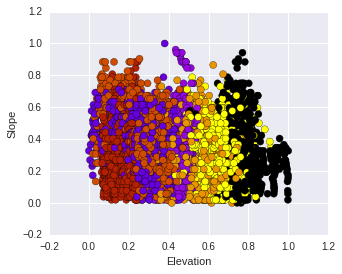

In [22]:
#Elevation adjusted vs HD Hydrology 
plt.figure(figsize=(5,4))
plt.scatter(smaller_frame.Elevation- 0 * smaller_frame.Slope,
            (smaller_frame.Slope),
            c=smaller_frame.Cover_Type,
            s=50, cmap=plt.cm.gnuplot_r)
plt.xlabel("Elevation")
plt.ylabel("Slope")
plt.savefig('elv_slope.png')

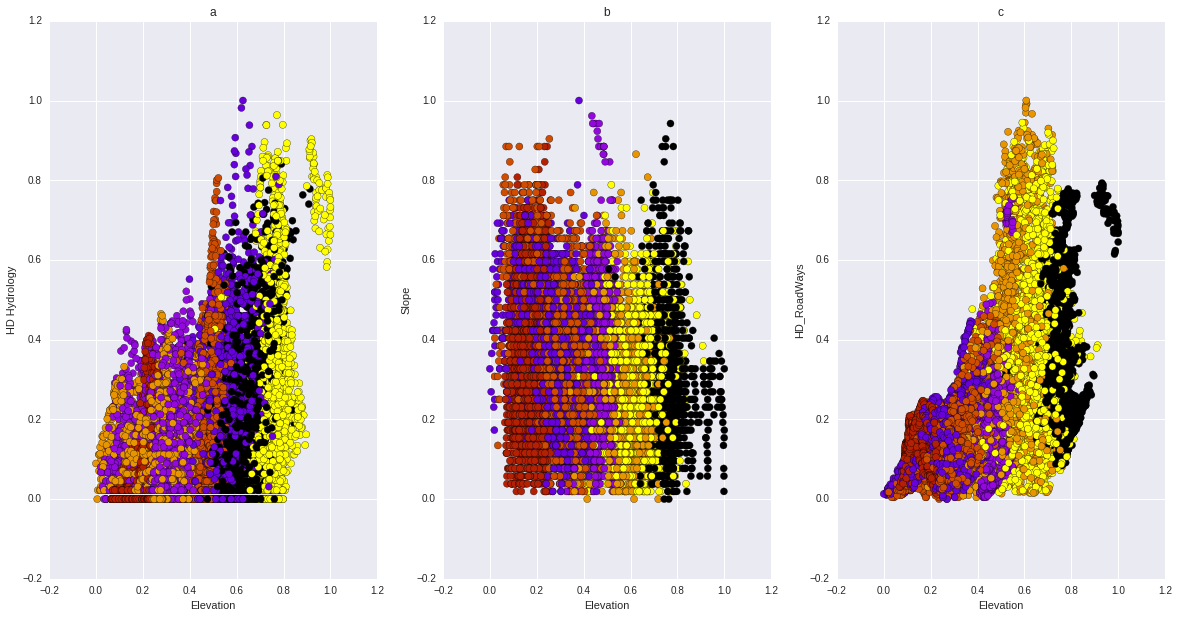

In [23]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.scatter(smaller_frame.Elevation, 
            smaller_frame.HD_Hydrology, 
            c=smaller_frame.Cover_Type, s=50, cmap=plt.cm.gnuplot)
plt.xlabel("Elevation")
plt.ylabel("HD Hydrology")
plt.title('a')

plt.subplot(1,3,2)
plt.scatter(smaller_frame.Elevation,
            (smaller_frame.Slope),
            c=smaller_frame.Cover_Type,
            s=50, cmap=plt.cm.gnuplot_r)
plt.xlabel("Elevation")
plt.ylabel("Slope")
plt.title('b')

plt.subplot(1,3,3)
plt.scatter(smaller_frame.Elevation,
           (smaller_frame.HD_Roadways),
            c=smaller_frame.Cover_Type,
            s=50, cmap=plt.cm.gnuplot_r)
plt.xlabel("Elevation")
plt.ylabel("HD_RoadWays")
plt.title('c')

plt.savefig("elv_vs_others.png")